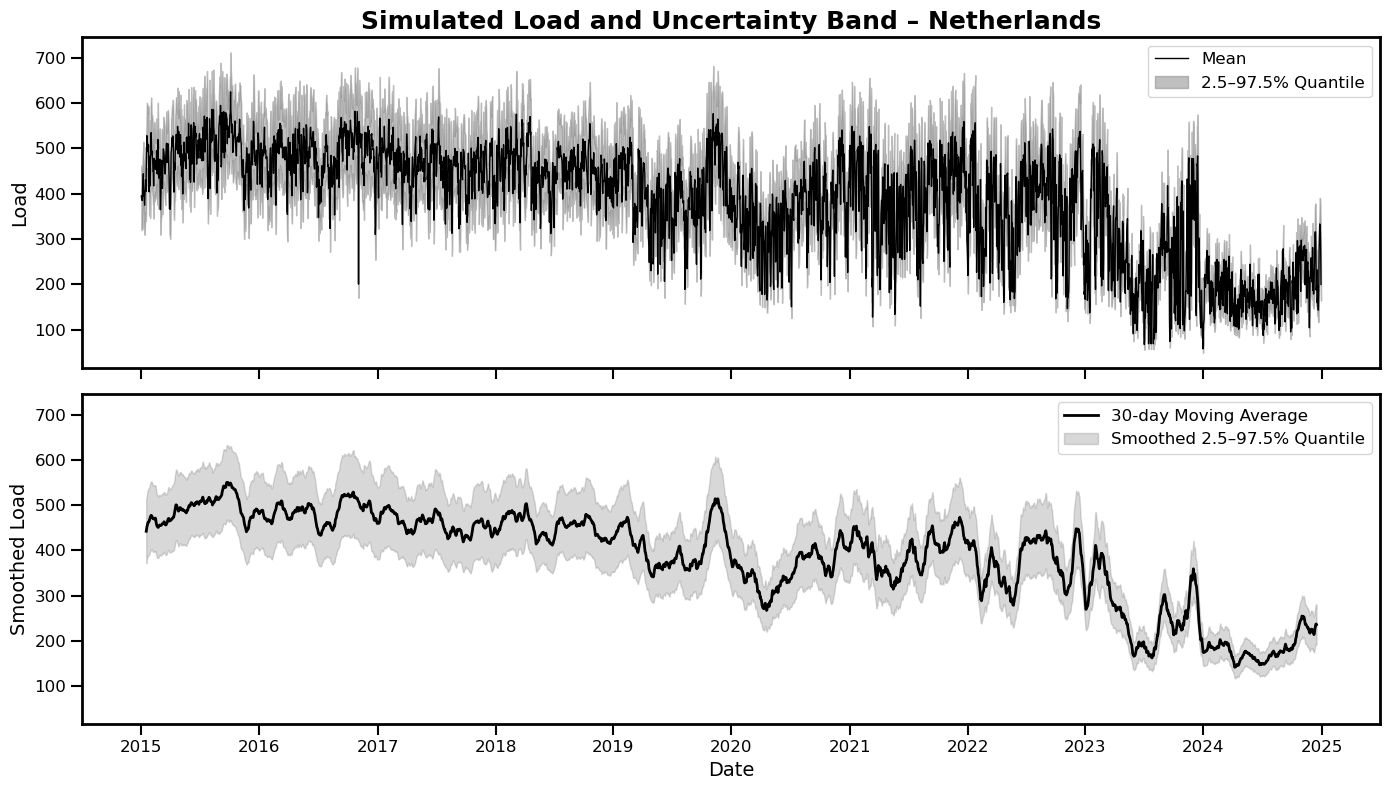

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 设置数据路径和目标国家
data_path = '/burg/glab/users/wz2481/Power_project/MC_uncertainty/summarize'
sel_country = 'Netherlands'
file_path = os.path.join(data_path, f'{sel_country}.csv')

# 读取数据
df = pd.read_csv(file_path)
df = df.set_index(['Unnamed: 0'])
df.index = pd.to_datetime(df.index)

# 计算原始统计量
mean_series = df.mean(axis=1)
q05_series = df.quantile(0.025, axis=1)
q95_series = df.quantile(0.975, axis=1)

# === 计算7天滑动平均（包括不确定区间）===
days_num = 30
mean_smooth = mean_series.rolling(window=days_num, center=True).mean()
q05_smooth = q05_series.rolling(window=days_num, center=True).mean()
q95_smooth = q95_series.rolling(window=days_num, center=True).mean()

# 画图（两个子图）
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), sharex=True, sharey=True)

# 第一张图：原始均值和不确定区间
axes[0].plot(df.index, mean_series, label='Mean', color='black', linewidth=1)
axes[0].fill_between(df.index, q05_series, q95_series, color='gray', alpha=0.5, label='2.5–97.5% Quantile')
axes[0].set_ylabel('Load', fontsize=14)
axes[0].set_title(f'Simulated Load and Uncertainty Band – {sel_country}', fontsize=18, weight='bold')
axes[0].legend(fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=12, length=8, width=1.5, direction='out')
axes[0].grid(False)
for spine in axes[0].spines.values():
    spine.set_linewidth(2)

# 第二张图：7天滑动平均及其不确定区间
axes[1].plot(df.index, mean_smooth, label=f'{days_num}-day Moving Average', color='black', linewidth=2)
axes[1].fill_between(df.index, q05_smooth, q95_smooth, color='gray', alpha=0.3, label='Smoothed 2.5–97.5% Quantile')
axes[1].set_xlabel('Date', fontsize=14)
axes[1].set_ylabel('Smoothed Load', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12, length=8, width=1.5, direction='out')
axes[1].grid(False)
for spine in axes[1].spines.values():
    spine.set_linewidth(2)

plt.tight_layout()
plt.show()